In [1]:
import os
os.chdir('C:/Users/raj3599/Desktop/letsuprade')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mannwhitneyu, ttest_ind, pearsonr

In [3]:
df = pd.read_csv('general_data.csv')

# prepossecing data

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
df.shape

(4410, 24)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [8]:

df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,...,0.0,Y,12,8,0,NaN,6,21,3,9


In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.duplicated().sum() 

0

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4404    False
4405    False
4406    False
4407    False
4408    False
Length: 4382, dtype: bool

# Univariant Analysis

In [13]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [14]:
df1 = df[['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
          'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [15]:
df1.mean().to_frame(name = 'Mean')

,Mean
Age,36.933364
DistanceFromHome,9.198996
Education,2.912369
JobLevel,2.063898
MonthlyIncome,65061.702419
NumCompaniesWorked,2.693291
PercentSalaryHike,15.210634
TotalWorkingYears,11.290278
TrainingTimesLastYear,2.798266
YearsAtCompany,7.010497


In [16]:
df1.median().to_frame(name = 'Median')

,Median
Age,36.0
DistanceFromHome,7.0
Education,3.0
JobLevel,2.0
MonthlyIncome,49190.0
NumCompaniesWorked,2.0
PercentSalaryHike,14.0
TotalWorkingYears,10.0
TrainingTimesLastYear,3.0
YearsAtCompany,5.0


In [17]:
df1.mode().T

,0
Age,35.0
DistanceFromHome,2.0
Education,3.0
JobLevel,1.0
MonthlyIncome,23420.0
NumCompaniesWorked,1.0
PercentSalaryHike,11.0
TotalWorkingYears,10.0
TrainingTimesLastYear,2.0
YearsAtCompany,5.0


In [18]:
df1.var().to_frame(name = 'Variance')

,Variance
Age,8.348974e+01
DistanceFromHome,6.569744e+01
Education,1.050068e+00
JobLevel,1.223490e+00
MonthlyIncome,2.222397e+09
NumCompaniesWorked,6.239165e+00
PercentSalaryHike,1.341762e+01
TotalWorkingYears,6.061739e+01
TrainingTimesLastYear,1.662558e+00
YearsAtCompany,3.756894e+01


In [19]:
df1.skew().to_frame(name = 'Skewness')

,Skewness
Age,0.413048
DistanceFromHome,0.955517
Education,-0.288977
JobLevel,1.021797
MonthlyIncome,1.367457
NumCompaniesWorked,1.029174
PercentSalaryHike,0.819510
TotalWorkingYears,1.115419
TrainingTimesLastYear,0.551818
YearsAtCompany,1.764619


In [20]:
df1.kurt().to_frame(name = 'kurtosis')

,kurtosis
Age,-0.409517
DistanceFromHome,-0.230691
Education,-0.565008
JobLevel,0.388189
MonthlyIncome,0.990836
NumCompaniesWorked,0.014307
PercentSalaryHike,-0.306951
TotalWorkingYears,0.909316
TrainingTimesLastYear,0.494215
YearsAtCompany,3.930726


In [21]:
df1.std().to_frame(name = 'Std. Deviation')

,Std. Deviation
Age,9.137272
DistanceFromHome,8.105396
Education,1.024728
JobLevel,1.106115
MonthlyIncome,47142.310175
NumCompaniesWorked,2.497832
PercentSalaryHike,3.663007
TotalWorkingYears,7.785717
TrainingTimesLastYear,1.289402
YearsAtCompany,6.129351



Inference from the analysis:

1) All the above variables show positive skewness; while Age & Mean_distance_from_home are leptokurtic and all other variables are platykurtic. 2) The Mean_Monthly_Income’s IQR is at 54K suggesting company wide attrition across all income bands 3) Mean age forms a near normal distribution with 13 years of IQR

# DATA VISUALIZATION

In [22]:
def plotBox(df_temp):
    fig = plt.figure(figsize=(20,30))
    for i, col in enumerate(df_temp.columns):
        plt.subplot(3, 4, i+1)
        plt.boxplot(df_temp[col])
        plt.title(col)
        
    plt.show()
    
   

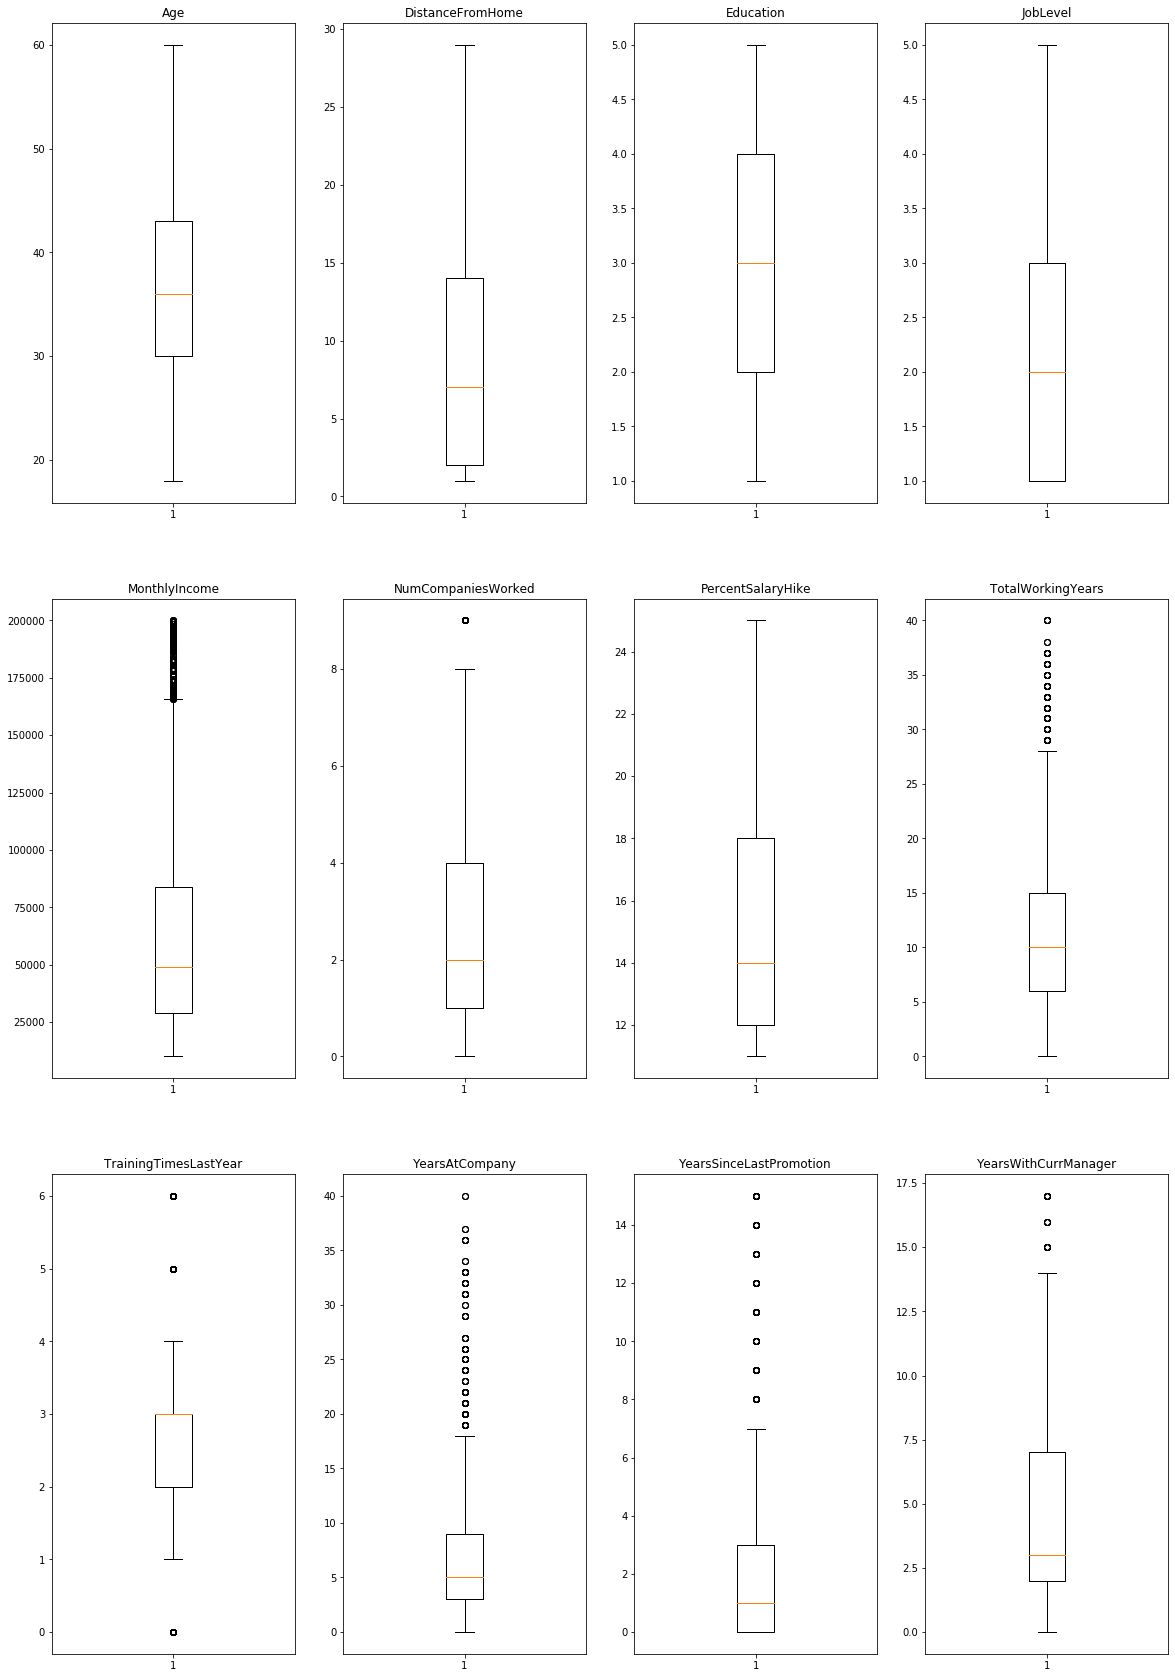

In [23]:
 plotBox(df1)

Age, Education are normally distributed
DistanceFromHome, JobLevel, PercentSalaryHike are Right Skewed with no outliers
Rest all the other columns are Right Skewed with several outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB099D2088>,
      dtype=object)

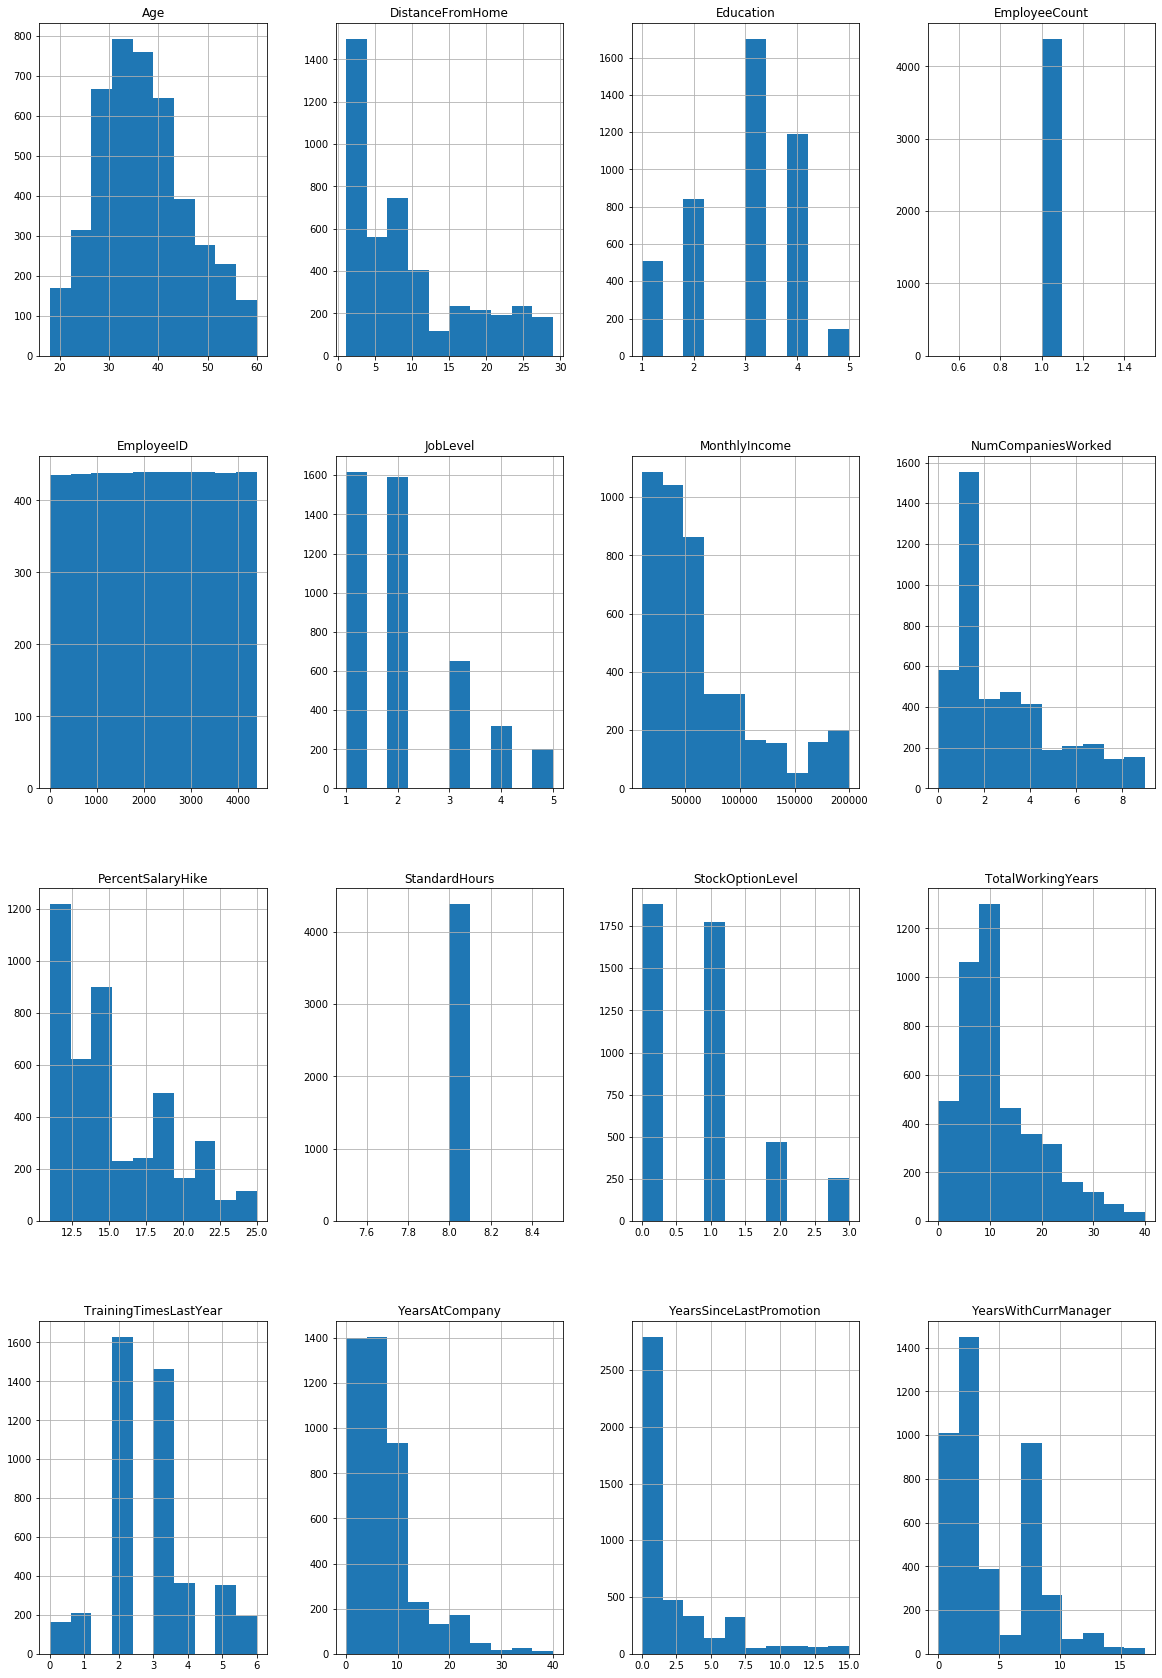

In [24]:

df.hist(figsize =(20,30))

Age, Education, TrainingTimesLastYear data are symmetric and has its peak in middle. (Mesokurtic)
Rest of the data are unsymmetric and has it's peak at the left side. (Positively skewed)

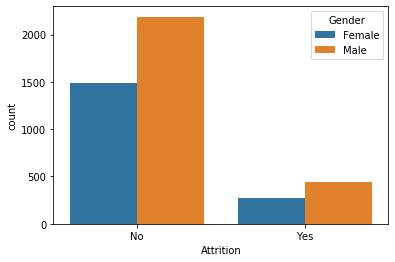

In [25]:
import seaborn as sns
sns.countplot(x = "Attrition",data=df,hue="Gender")
plt.show()

Thus from Attrition Vs Gender we can conclude that number of females leaving the company is less than the number of males leaving the company

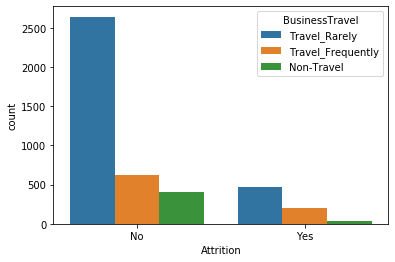

In [26]:
sns.countplot(x='Attrition',hue='BusinessTravel', data=df)

from the plot it can be concluded that people who travel rarely are leaving the company more

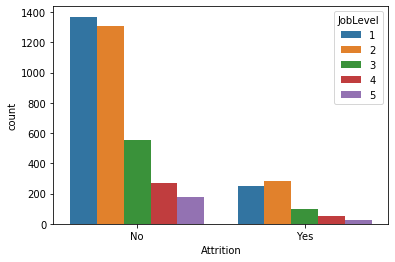

In [27]:
sns.countplot(x = "Attrition",data=df,hue="JobLevel")
plt.show()

it can be concluded that people leaving the company decreases with increase in job level

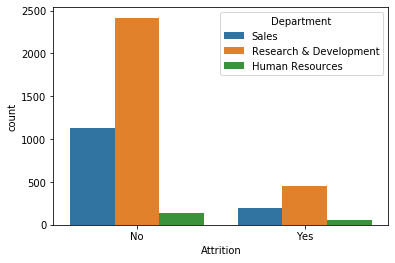

In [28]:
sns.countplot(x = "Attrition",data=df,hue="Department")
plt.show()

it can be concluded that people leaving the company  are more in reasearch department

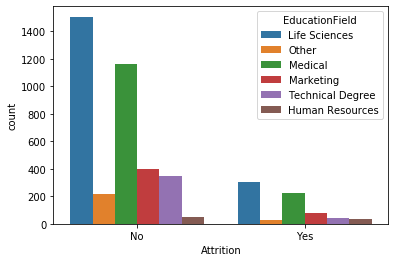

In [29]:
sns.countplot(x = "Attrition",data=df,hue="EducationField")
plt.show()

it can be concluded that people leaving the company are more in life sciences

In [ ]:
sns.pairplot(df[['Attrition' ,'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
          'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']], hue = 'Attrition')

# STATISTICAL ANALYSIS

In [ ]:
corr=df.corr()
corr

In [ ]:
def plotCorr(df_temp):
    x, y = len(df_temp.columns), len(df_temp.columns)
    fig, ax = plt.subplots(figsize=(x, y))
    sns.heatmap(df_temp.corr(), ax = ax, annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

In [ ]:
plotCorr(df)

Inference:
The above heat map shows that Attrition has weak positive correlation with PercentSalaryHike, NumCompaniesWorked and a strong positive correlation with MaritalStatus.
Also,strong negative correlation of Attrition with Age, YearsAtCompany, YearsWithCurrManager and TotalWorkingYears exist.
Moreover, these results shows the correlation and dependency of Attrition with other fields as a whole but our objective was to sort out and check the dependency of various fields with Attrition='Yes', for this we have to perform one-hot encoding.

In [ ]:
df2 = df[['Attrition', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']]
df2

In [ ]:
dfY=df2[df.Attrition == 'Yes']
dfN=df2[df.Attrition == 'No']

In [ ]:
def mannWhitneyu(df_temp1, df_temp2):
    for col in df_temp1.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = mannwhitneyu(df_temp1[col], df_temp2[col])
        print(stat, p)
        check(p)

def ttestInd(df_temp1, df_temp2):
    for col in df_temp1.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = ttest_ind(df_temp2[col], df_temp1[col])
        print(stat, p)
        check(p)

def Pearsonr(df_temp1):
    df_temp = df2.copy()
    df_temp.Attrition.replace(to_replace = ('No','Yes'),value = (0,1),inplace = True)
    for col in df2.columns[1:]:
        print(f'Attrition & {col}')
        stat, p = pearsonr(df_temp['Attrition'], df_temp1[col])
        print(stat, p)
        check(p)

def check(p):
        if p < 0.05:
            print(f'As the p value is 0.0, which is < than 0.05, the H0 is rejected and Ha is accepted\n')
        else:
            print(f'As the p value is > than 0.05, the H0 is accepted and Ha is rejected\n')

In [ ]:

print('mannwhitneyu:\n')
mannWhitneyu(dfY, dfN)

In [ ]:

print('ttest_ind:\n')
ttestInd(dfY, dfN)

In [ ]:
print('pearsonr:\n')
Pearsonr(df2)

# Conclusion
To reduce the attrition rate more focus should be laid on HR Department Travel Frequency of Employees should be reduced as it increasing the travel frequency increases the attrition rate.
 Employees with more Education level should be hired more than lower education.
People who are married should give higher priority while hiring new employees as they have low chances of attrition.
More care should be taken of Research Directors as they have higher chances of Attrition.
Employees who have higher experience should be hired as they very low chances of Attrition.
More care should be taken of Employees who are single as they have higher chances of Attrition.
More care should be taken of Employees who are younger in age.
People around 36 years of age should be hire more as they have lower chances of Attrition.